# Tasks notebook for applied_statistics

## Task 1: Permutations and Combinations

Suppose we alter the Lady Tasting Tea (https://en.wikipedia.org/wiki/Lady_tasting_tea) experiment to involve twelve cups of tea. Six have the milk in first and the other six having tea in first. A person claims they have the special power of being able to tell whether the tea or the milk went into a cup first upon tasting it. You agree to accept their claim if they can tell which of the six cups in your experiment had the milk in first.

Calculate, using Python, the probability that they select the correct six cups. Here you should assume that they have no special powers in figuring it out, that they are just guessing. Remember to show and justify your workings in code and MarkDown cells.

Suppose, now, you are willing to accept one error. Once they select the six cups they think had the milk in first, you will give them the benefit of the doubt should they have selected at least five of the correct cups. Calculate the probability, assuming they have no special powers, that the person makes at most one error.

Would you accept two errors? Explain.

In [1]:
# Import any required functions

# math.comb
import math

# Random Numbers
import random

# Lists
import itertools

# Mathematical Functions
import numpy as np

# Plotting
import matplotlib.pyplot as plt

# Statistical Functions
import scipy.stats as stats

# Plotting
import seaborn as sns

# Statistics
from statistics import mean

# Dataframes
import pandas as pd

Define any variables that we will use

In [2]:
# Variables

num_cups_of_tea = 12
num_cups_with_milk_first = 6
num_cups_with_tea_first = 6

Calculate number of ways to choose 6 elements from a list of 12 using math.comb

In [3]:
# math.comb
# https://docs.python.org/3/library/math.html

num_ways = math.comb(num_cups_of_tea, num_cups_with_milk_first)
num_ways

924

Validation

In [4]:
# Validate the math.comb result using factorials 
# (https://www.geeksforgeeks.org/factorial-in-python/) and https://docs.python.org/3/library/itertools.html
# n! / r! / (n-r)!

n = math.factorial(12)
r = math.factorial(6)
num_ways2 = n //r // math.factorial(12 - 6)
num_ways2


924

To calcalate the probability of the lady selecting the correct six cups...divide the number of favourable outcomes (i.e. 1) by the total number of possible outcomes (i.e. 924)

In [5]:
1/num_ways

0.0010822510822510823

So, roughly 1 in 1000 chance of selecting the correct six cups

Next, to calculate the probability that the lady makes at most one error (i.e. selects five or six correct cups) we can calculate the probabilities for each possible outcome.

In [6]:
# Add a label for each cup

labels = list(range(num_cups_of_tea))

labels

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]

Generate a list of the possible combinations of choosing 6 items from a list of 12

In [7]:
# Ways/possible combinations to choose six from 12

possible_combinations = list(itertools.combinations(labels, num_cups_with_milk_first))

len(possible_combinations)
#possible_combinations

924

Generate a random selection of six cups to simulate the lady picking them herself.

In [8]:
cups_with_milk_sample = random.sample(labels,6)

cups_with_milk_sample.sort()

#set(cups_with_milk_sample)
cups_with_milk_sample


[0, 2, 4, 5, 6, 7]

In [9]:
# Convert the data into a set

set(cups_with_milk_sample)

{0, 2, 4, 5, 6, 7}

Check where the data overlaps

In [10]:
# Create a list to hold overlaps between the two sets of data - possible combinations and the randomly selected combination

num_overlaps = []

for combination in possible_combinations:
    s1 = set(combination)
    s2 = set(cups_with_milk_sample)
    overlap = s1.intersection(s2)
    #print(combination, overlap, len(overlap))
    num_overlaps.append(len(overlap))



In [11]:
# Show the number per overlap - commented out for now 

#num_overlaps

Calculate the count of each possible overlap

In [12]:
counts = np.unique(num_overlaps, return_counts=True)

counts

(array([0, 1, 2, 3, 4, 5, 6]), array([  1,  36, 225, 400, 225,  36,   1]))

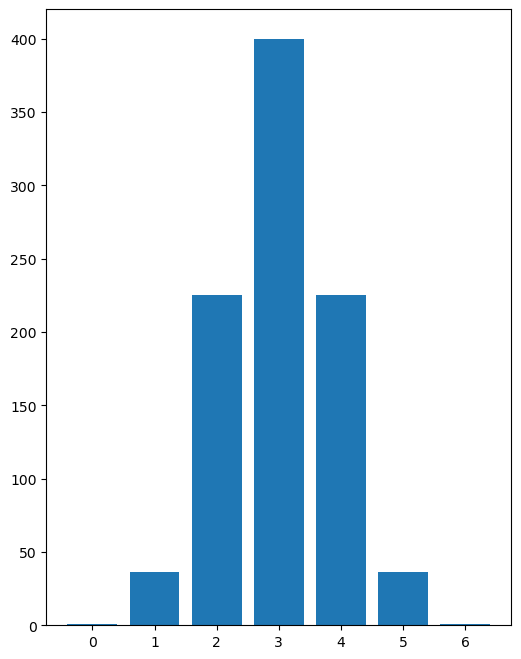

In [13]:
# plot the possibilities of choosing each correct number of cups - from none to six

fig, ax = plt.subplots(figsize=(6,8))
ax.bar(counts[0], counts[1]);

Probability of making one mistake (i.e. picking five of six correctly) is 1+36/924 (i.e. Bin5 + Bin6 in our chart above)

In [14]:
37/924

0.04004329004329004

Probability of making two mistakes (i.e. picking four of six correctly) is 225+36+1/924 (i.e. Bin4 + Bin5 + Bin6 in our chart above)

In [15]:
(225+36+1)/924

0.28354978354978355

There is a probability of over 28% of making at most two errors, i.e. picking four correctly with six guesses. It would be hard to believe that the lady had any special powers if over a quarter of the time anybody could guess four out of the six correctly.

## Task 2: numpy's Normal Distribution

In this task you will assess whether numpy.random.normal() properly generates normal values. To begin, generate a sample of one hundred thousand values using the function with mean 10.0 and standard deviation 3.0.

Use the scipy.stats.shapiro() function to test whether your sample came from a normal distribution. Explain the results and output.

Plot a histogram of your values and plot the corresponding normal distribution probability density function on top of it.

In [16]:
# Define variables and generate sample values

count = 100000
mu = 10.0
sigma = 3.0

sample = np.random.normal(mu, sigma, count)

sample

array([11.01194762, 12.34209414,  0.72151786, ...,  8.95931958,
       15.4871249 , 14.59677658])

Test for Normality using scipy.stats.shapiro()   
https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.shapiro.html

In [17]:
# Caclulate and display test statistic and p value

res = stats.shapiro(sample)
res
# res.statistic

/Users/pbarry/anaconda3/lib/python3.11/site-packages/scipy/stats/_morestats.py:1816: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


ShapiroResult(statistic=0.9999831914901733, pvalue=0.9692630171775818)

With a $p$ value of 0.809 we have no reason to reject the null hypothesis that the data is normally distributed   
https://docs.scipy.org/doc/scipy-1.12.0/reference/generated/scipy.stats.shapiro.html

Plot the histogram using an appropriate number of bins

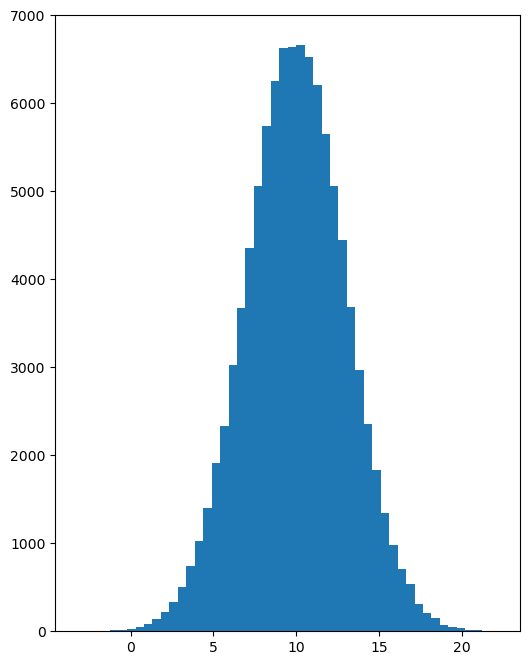

In [18]:
# Plot Histogram

fig, ax = plt.subplots(figsize=(6,8))
bins = 50
plt.hist(sample, bins);

Overlay the Probability Density Function on top of the histogram

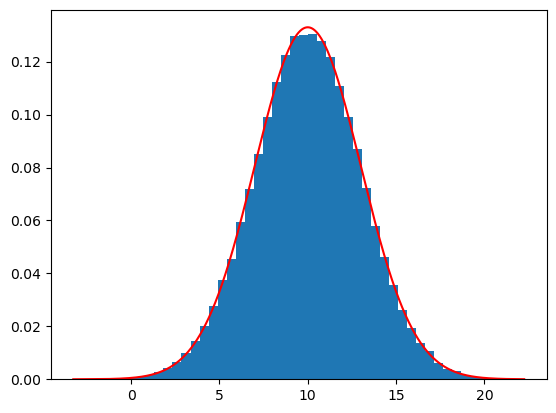

In [19]:
# Overlay PDF on to Histogram
# https://stackoverflow.com/questions/52423635/how-to-plot-normalized-histogram-with-pdf-properly-using-matplotlib
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.norm.html

sample=np.sort(sample)

pdf = stats.norm.pdf(sample,loc=mu,scale=sigma)
plt.hist(sample, bins, density=True);
plt.plot(sample, pdf, color='r')
plt.show() 


## Task 3: $t$ Test Calculation

Consider the following dataset containing resting heart rates for patients before and after embarking on a two-week exercise program.

| Patient ID | Before | After |
| --- | --- | --- |
| 0 | 63 | 64 |
| 1 | 68 | 64 |
| 2 | 70 | 68 |
| 3 | 64 | 64 |
| 4 | 74 | 73 |
| 5 | 67 | 70 |
| 6 | 70 | 72 |
| 7 | 57 | 54 |
| 8 | 66 | 61 |
| 9 | 65 | 63 |


Calculate the $t$ statistic based on this data set, using Python. Compare it to the value given by scipy.stats. Explain your work and list any sources used.

In [20]:
# Create the data

grp_before = [63,68,70,64,74,67,70,57,66,65]
grp_after = (64,64,68,64,73,70,72,54,61,63)

Basic statistics to validate that the results will be accurate by checking the following assumptions have been met (https://builtin.com/data-science/t-test-python).   
- Independence of observations   
- Normality   
- Equal variances

In [21]:
# Convert to dataframe to use the describe() function

grp_after_df = pd.DataFrame(grp_after)
grp_before_df = pd.DataFrame(grp_before)

In [22]:
# SHow the Before data

grp_before_df.describe()

,0
count,10.00000
mean,66.40000
std,4.64758
min,57.00000
25%,64.25000
50%,66.50000
75%,69.50000
max,74.00000


In [23]:
# Show the After data

grp_after_df.describe()

,0
count,10.000000
mean,65.300000
std,5.677441
min,54.000000
25%,63.250000
50%,64.000000
75%,69.500000
max,73.000000


We can see a significant difference in the mean resting heart rate, reducing from 66.4 down to 65.3 beats per minute!

Visualise the data in graphs

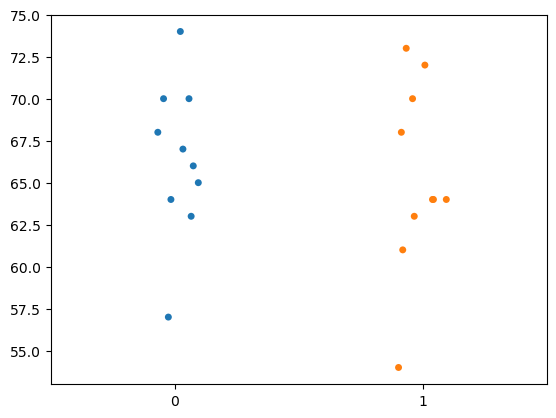

In [24]:
# Plot the data using a strip plot

sns.stripplot(data=[grp_before, grp_after]);

### Calculate $t$ statistic using python ###

Using a paired samples $t$ test as the data comes from a before and after scenario (https://www.jmp.com/en_nl/statistics-knowledge-portal/t-test/paired-t-test.html)

Students's $t$ test for paired samples formula from https://en.wikipedia.org/wiki/Student%27s_t-test

$t = $ $\bar{X}_{D}$ - $\mu_{0}$ $/s_{D}$ $/$ $\sqrt n$

$\bar{X}_{D}$ - average of the differences between all pairs   
$s_{D}$ - standard deviation of the differences between all pairs   
The constant μ0 is zero if we want to test whether the average of the difference is significantly different   
The degree of freedom used is $n − 1$, where $n$ represents the number of pairs

In [25]:
# Using the above formula in python
# Calculate the values we need for the formula

# Differences in the means
mean_diff = (np.mean(grp_before) - np.mean(grp_after))

# Standard Deviation of the two groups
diff_group = []
x = 0
while x < 10:
    diff_group.append(grp_before[x] - grp_after[x])
    x+= 1
std_dev = np.std(diff_group)

# Average difference
ave_diff = sum(diff_group)/10

In [26]:
# Calculate the t statistic

python_t_stat = ave_diff/(std_dev/math.sqrt(len(diff_group)-1))
python_t_stat

1.337227482480628

Calculate $t$ statistic using scipy.stats

In [27]:
# Using scipy.stats
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_rel.html#ttest-rel

stats.ttest_rel(grp_before, grp_after)

TtestResult(statistic=1.337227482480628, pvalue=0.21396011317404623, df=9)

The results above show the same $t$ statistic value is reached when calculating using the $t$ test formula retrieved from Wikipedia and when using scipy.stats.

## Task 4: ANOVA

In this test we will estimate the probability of committing a type II error in specific circumstances. To begin, create a variable called no_type_ii and set it to 0.

Now use a loop to perform the following test 10,000 times.

Use numpy.random.normal to generate three samples with 100 values each. Give each a standard deviation of 0.1. Give the first sample a mean of 4.9, the second a mean of 5.0, and the third a mean of 5.1.

Perform one-way anova on the three samples and add 1 to no_type_ii whenever a type II error occurs.

Summarize and explain your results.

In [28]:
# Generate variable to store number of type II errors

no_type_ii = 0

Initialise the variables to use for the test

In [29]:
# Define variables

count = 100
x = 0
mu1 = 4.9
mu2 = 5.0
mu3 = 5.1
sigma = 0.1

Perform the ANOVA test

An ANOVA test compares the means of two or more independent groups of data and will confirm if the means are significantly different. A type II error occurs when we fail to reject a null hypothesis that is actually false.

In [30]:
# Perform the ANOVA test 10,000 times

# Loop through 10000 times
while x < 10000:
    sample1 = np.random.normal(mu1, sigma, count)
    sample2 = np.random.normal(mu2, sigma, count)
    sample3 = np.random.normal(mu3, sigma, count)
    f_statistic, p_value = stats.f_oneway(sample1, sample2, sample3)
    #print(f_statistic, p_value)

    # Increment error count
    if (p_value > 0.05):
        no_type_ii = no_type_ii+1
    x=x+1

# Display the result
print (f'Number of type II errors: {no_type_ii}')

Number of type II errors: 0


Given that the data we were using had different means we would expect to see the $p$ value being less than the alpha value of 0.05 every time we run the test. This would result in correctly rejecting the null hypothesis that the means are the same and accepting the alternative hypothesis that at least one of the means is different. 

## End